In [36]:
import os
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import mplhep as hep
from coffea.hist import Hist, plot
from coffea.util import load

In [41]:
cfg = {
    "variables" : {
        "muon_pt" : {'binning' : {'n_or_arr' : 200, 'lo' : 0, 'hi' : 2000}, 'xlim' : (0,500),  'xlabel' : "$p_{T}^{\mu}$ [GeV]"},
        "muon_eta" : None,
        "muon_phi" : None,
        "electron_pt" : {'binning' : {'n_or_arr' : 400, 'lo' : 0, 'hi' : 2000}, 'xlim' : (0,500),  'xlabel' : "$p_{T}^{e}$ [GeV]"},
        "electron_eta" : {'binning' : {'n_or_arr' : [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5660, -1.4442, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4442, 1.5660, 1.7, 1.9, 2.1, 2.3, 2.5]}, 'xlim' : (-2.5,2.5), 'xlabel' : "Electron $\eta$"},
        "electron_etaSC" : {'binning' : {'n_or_arr' : [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5660, -1.4442, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4442, 1.5660, 1.7, 1.9, 2.1, 2.3, 2.5]}, 'xlim' : (-2.5,2.5), 'xlabel' : "Electron Supercluster $\eta$"},
        "electron_phi" : {'binning' : {'n_or_arr' : 24, 'lo' : -pi, 'hi' : pi}, 'xlim' : (-pi,pi), 'xlabel' : "$\phi_{e}$"},
        "jet_pt" : None,
        "jet_eta" : None,
        "jet_phi" : None,
        "nmuon" : None,
        "nelectron" : None,
        "nlep" : None,
        "njet" : {'xlim' : (4,14)},
        "nbjet" : None,
    },
}

In [2]:
x = np.linspace(0,10,11)
y = 2*x
y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

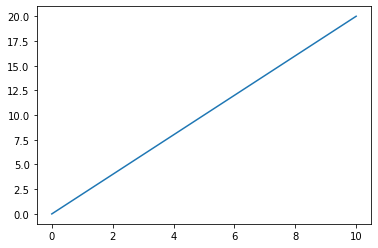

In [3]:
lines = plt.plot(x, y)

In [4]:
data_x, data_y = lines[0].get_data()
data_y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [5]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_lumimask_etaSC_v11/output.coffea"
plot_dir = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_lumimask_etaSC_v11/plots/datamc/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output = load(filename)
output

{'sum_genweights': defaultdict_accumulator(float,
                         {'TTToSemiLeptonic': 143354138329.1336,
                          'TTTo2L2Nu': 10457567170.13379}),
 'cutflow': {'Ele32_EleHT_pass': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 13707,
                           'DATA': 30034,
                           'TTTo2L2Nu': 942907}),
  'Ele32_EleHT_fail': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 20118,
                           'DATA': 12848,
                           'TTTo2L2Nu': 336815}),
  'inclusive': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 33825,
                           'DATA': 42882,
                           'TTTo2L2Nu': 1279722}),
  'initial': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 476408000,
                           'DATA': 985422152,
                           'TTTo2L2Nu': 145020000}),
  'skim': defaultdict_accumula

In [6]:
h = output["hist2d_electron_etaSC_vs_electron_pt"]
h

<Hist (sample,cat,year,pt,etaSC) instance at 0x7f854acf5d90>

In [7]:
h.identifiers('sample')

[<StringBin (DATA) instance at 0x7f854aed8670>,
 <StringBin (TTTo2L2Nu) instance at 0x7f854aed8610>,
 <StringBin (TTToSemiLeptonic) instance at 0x7f854aed86d0>]

In [8]:
datasets = [str(s) for s in h.identifiers('sample')]
datasets_mc = list(filter(lambda x : 'TTTo' in x, datasets))
h_data = h['DATA'].sum('sample', 'year')
h_mc = h[datasets_mc].sum('sample', 'year')
h_mc.values()

{('Ele32_EleHT_pass',): array([[1.44377055e-01, 4.18452262e-01, 4.65890457e-01, 8.02950435e-01,
         5.65676201e-01, 0.00000000e+00, 8.67969044e-01, 1.16942057e+00,
         7.62941863e-01, 5.02312352e-01, 4.82008832e-01, 6.97796359e-01,
         5.65734170e-01, 5.45455557e-01, 4.06804617e-01, 5.15471843e-01,
         5.56547862e-01, 5.33491306e-01, 3.61192177e-01, 6.65334087e-01,
         0.00000000e+00, 4.46778524e-01, 5.22399806e-01, 4.29246209e-01,
         2.46858341e-01, 2.04030402e-01],
        [2.80242405e+00, 1.81087595e+01, 6.24931610e+01, 9.01908295e+01,
         6.38412408e+01, 0.00000000e+00, 1.43272108e+02, 1.43283554e+02,
         1.64287862e+02, 1.94255648e+02, 2.06006907e+02, 2.14239028e+02,
         2.00506508e+02, 2.00540144e+02, 2.09135470e+02, 2.02702796e+02,
         1.92342686e+02, 1.60800863e+02, 1.35061410e+02, 1.40512743e+02,
         0.00000000e+00, 6.42991212e+01, 8.58537168e+01, 6.19581580e+01,
         1.83872083e+01, 3.65705123e+00],
        [3.067063

In [9]:
categories = [str(s) for s in h.identifiers('cat') if not 'inclusive' in str(s)]
print(categories)
cat = "Ele32_EleHT_pass"
eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]
sf = eff_data/eff_mc
sf = np.nan_to_num(np.where(~np.isinf(sf), sf, np.nan))
sf

['Ele32_EleHT_fail', 'Ele32_EleHT_pass']


/tmp/ipykernel_69652/1067904885.py:4: RuntimeWarning: invalid value encountered in true_divide
  eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
/tmp/ipykernel_69652/1067904885.py:5: RuntimeWarning: invalid value encountered in true_divide
  eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]


array([[0.        , 0.        , 2.16424328, 2.34054438, 3.58383178,
        0.        , 2.45292992, 0.94022904, 4.56212818, 4.04547676,
        0.        , 1.80995823, 3.74774589, 1.95927378, 2.6376908 ,
        0.        , 1.93723844, 0.        , 2.94711657, 3.41475307,
        0.        , 3.42684179, 1.75297686, 0.        , 4.2348749 ,
        0.        ],
       [0.64442052, 1.34356041, 1.18169839, 0.92387318, 0.88353377,
        0.        , 0.82778864, 0.73171038, 0.98319684, 0.86860025,
        0.99744883, 0.8397717 , 0.85954591, 0.81310246, 0.89611902,
        0.88246115, 0.88923449, 0.92372597, 0.86297654, 0.89099009,
        0.        , 0.83079573, 0.76486956, 1.16929351, 1.31048724,
        0.44213942],
       [1.06108046, 1.00261992, 0.95577015, 1.03311019, 0.97899967,
        0.        , 0.97851116, 0.96933833, 0.97558305, 0.99329366,
        0.98834008, 0.97776534, 0.96737689, 0.99519023, 0.93376414,
        0.96592246, 0.95197833, 0.96472967, 0.95866604, 0.93327107,
      

In [10]:
axis_pt = h.axes()[-2]
axis_eta = h.axes()[-1]
axis_eta.edges()

array([-2.5   , -2.3   , -2.1   , -1.9   , -1.7   , -1.566 , -1.4442,
       -1.2   , -1.    , -0.8   , -0.6   , -0.4   , -0.2   ,  0.    ,
        0.2   ,  0.4   ,  0.6   ,  0.8   ,  1.    ,  1.2   ,  1.4442,
        1.566 ,  1.7   ,  1.9   ,  2.1   ,  2.3   ,  2.5   ])

In [11]:
binwidth_pt = np.ediff1d(axis_pt.edges())
binwidth_eta = np.ediff1d(axis_eta.edges())

bincenter_pt = axis_pt.edges()[:-1] + 0.5*binwidth_pt
bincenter_eta = axis_eta.edges()[:-1] + 0.5*binwidth_eta
bincenter_eta

array([-2.4   , -2.2   , -2.    , -1.8   , -1.633 , -1.5051, -1.3221,
       -1.1   , -0.9   , -0.7   , -0.5   , -0.3   , -0.1   ,  0.1   ,
        0.3   ,  0.5   ,  0.7   ,  0.9   ,  1.1   ,  1.3221,  1.5051,
        1.633 ,  1.8   ,  2.    ,  2.2   ,  2.4   ])

In [12]:
eta, pt = np.meshgrid(bincenter_eta, bincenter_pt)
pt.shape

(11, 26)

In [13]:
sf.shape

(11, 26)

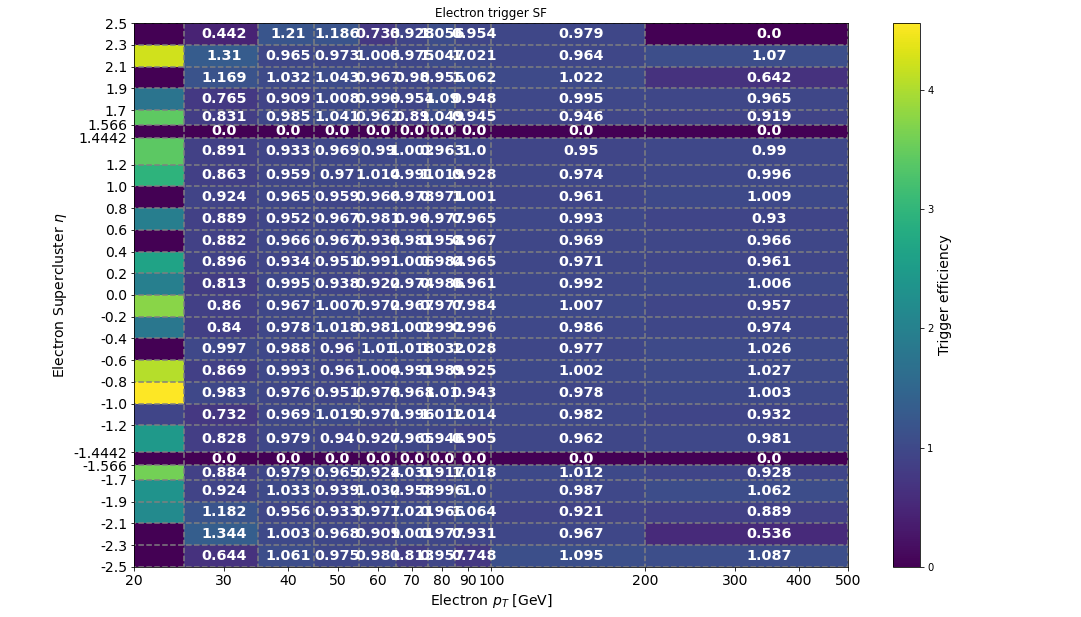

In [14]:
fontsize=14

fig, ax = plt.subplots(figsize=[16,10])
hist, xbins, ybins, im = plt.hist2d(pt.flatten(), eta.flatten(), weights=sf.flatten(), bins=(axis_pt.edges(), axis_eta.edges()))
plt.xlim(0, 500)
plt.xlabel(axis_pt.label, fontsize=fontsize)
plt.ylabel(axis_eta.label, fontsize=fontsize)
plt.xscale('log')
plt.xlim(20, 500)
xticks = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
yticks = axis_eta.edges()
plt.xticks(xticks, [str(t) for t in xticks], fontsize=fontsize)
plt.yticks(yticks, [str(t) for t in yticks], fontsize=fontsize)
plt.hlines(axis_eta.edges(), axis_pt.edges()[-1], axis_pt.edges()[0], linestyle='--', color='gray')
plt.vlines(axis_pt.edges(), axis_eta.edges()[-1], axis_eta.edges()[0], linestyle='--', color='gray')

for (i, x) in enumerate(bincenter_pt):
    for (j, y) in enumerate(bincenter_eta):
        ax.text(x, y, round(sf[i][j], 3), 
                color="w", ha="center", va="center", fontsize="x-large", fontweight="bold")

plt.title("Electron trigger SF")
cbar = plt.colorbar();
#cbar.set_ticklabels(cbar.ax.get_yticklabels(), fontsize=fontsize)
cbar.set_label("Trigger efficiency", fontsize=fontsize)

In [15]:
output['trigger_efficiency']['Ele32_EleHT_pass']

{'mc': 0.6314818139417291, 'data': 0.7003871088102234, 'sf': 1.109116831787103}

In [16]:
color_mc = {'TTo2L2Nu' : 'dodgerblue', 'TTToSemiLeptonic' : 'tomato'}
opts_mc  = {
    'facecolor': [color_mc[d] for d in color_mc.keys()],
    'edgecolor': 'black',
    'alpha': 1.0
}
opts_data = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/work/mmarcheg/mi

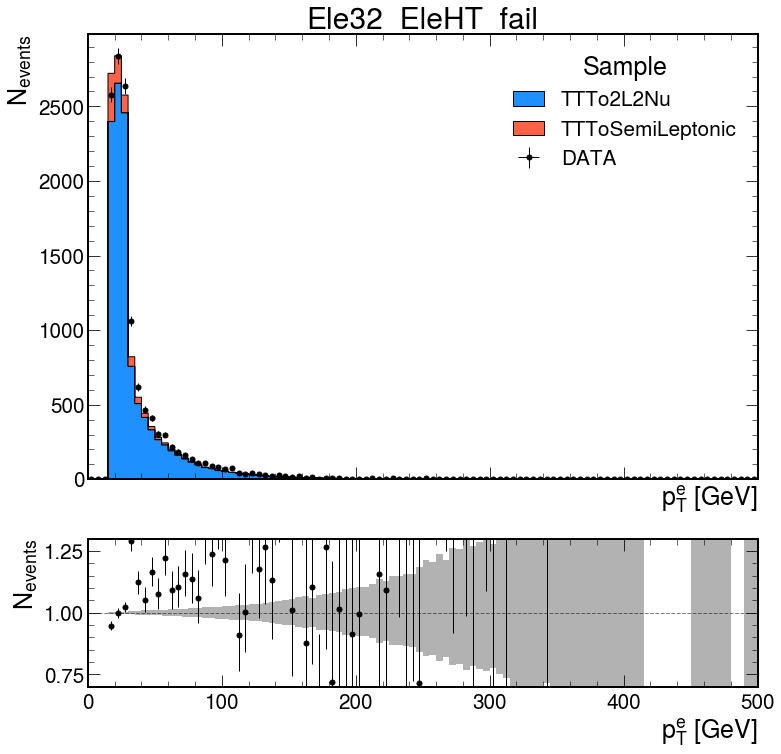

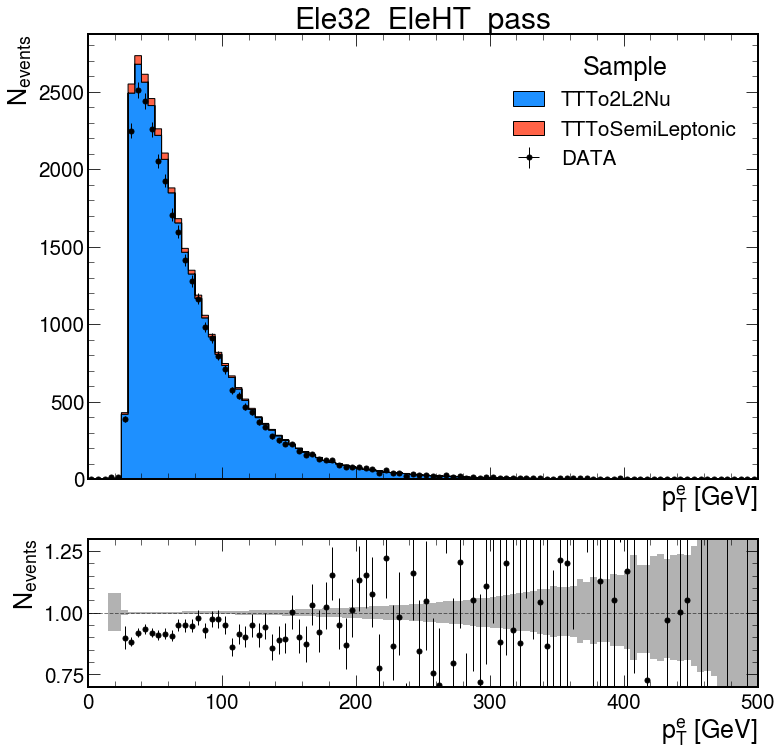

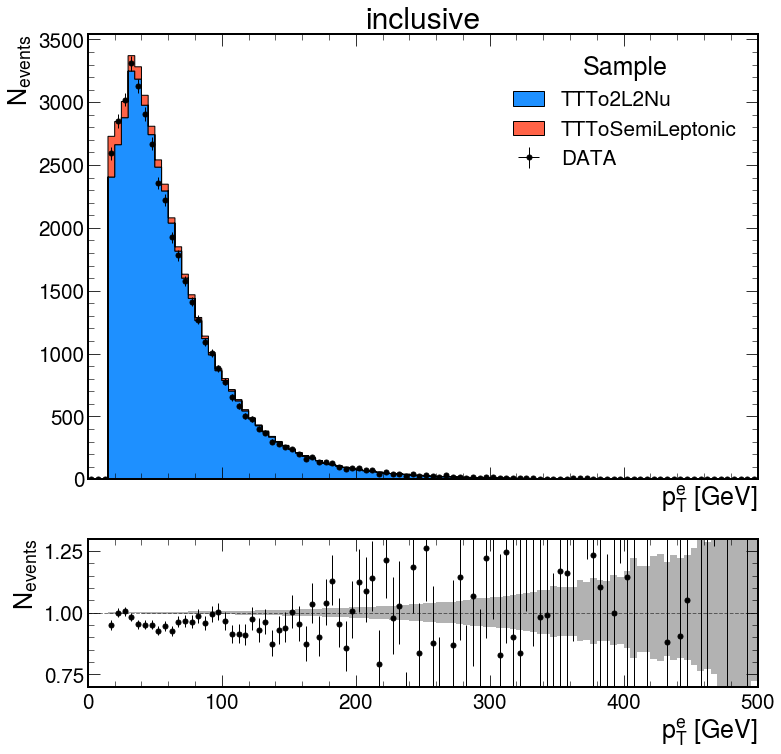

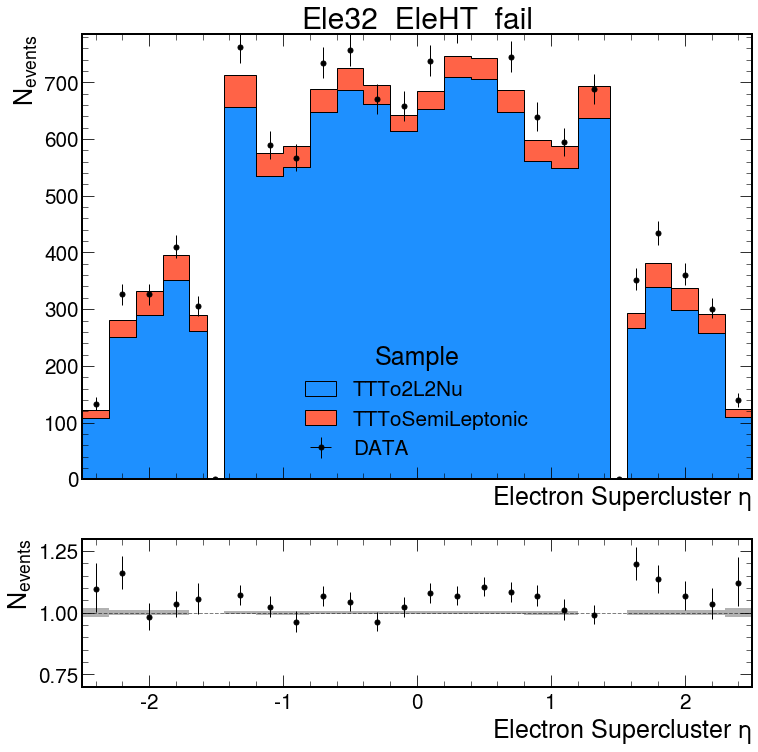

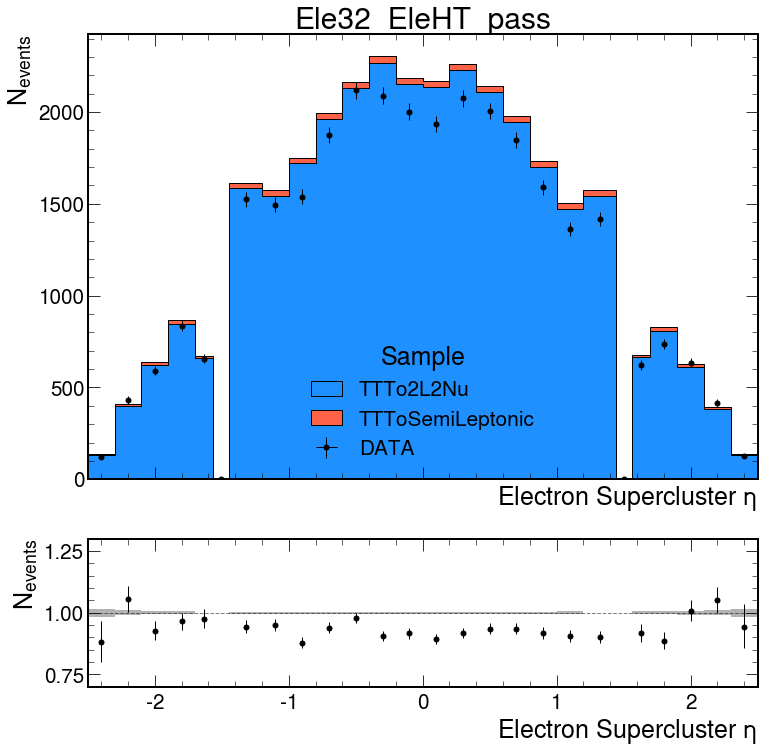

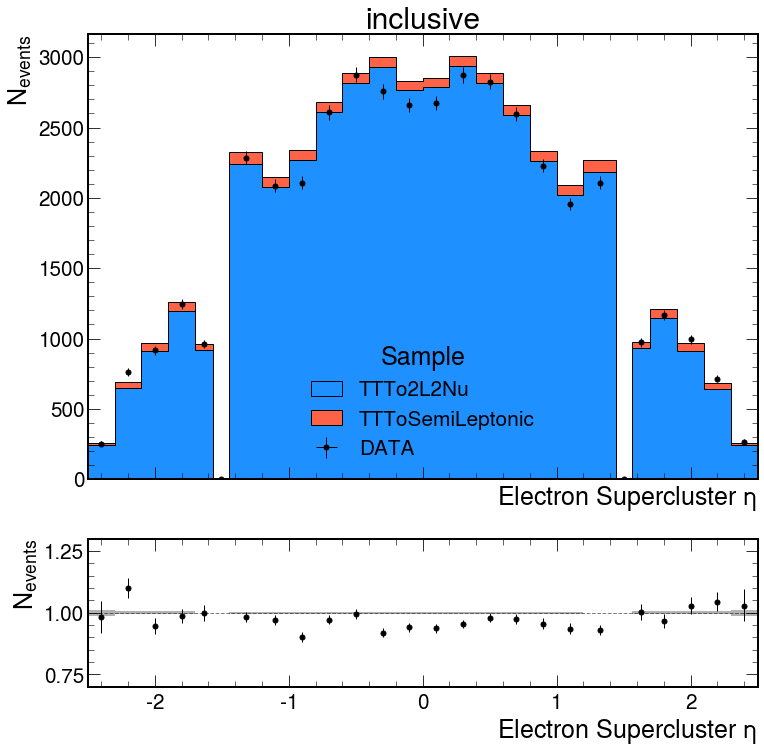

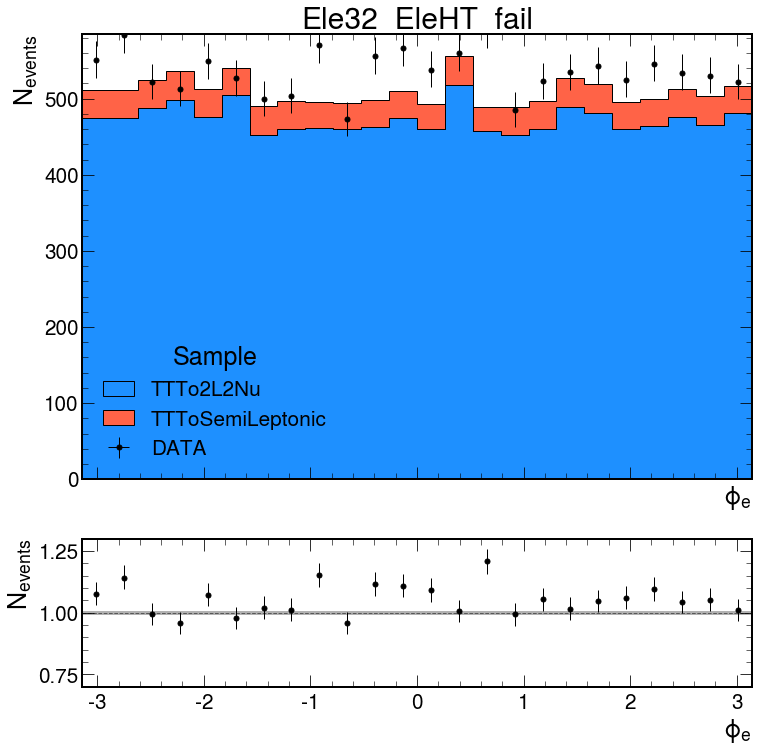

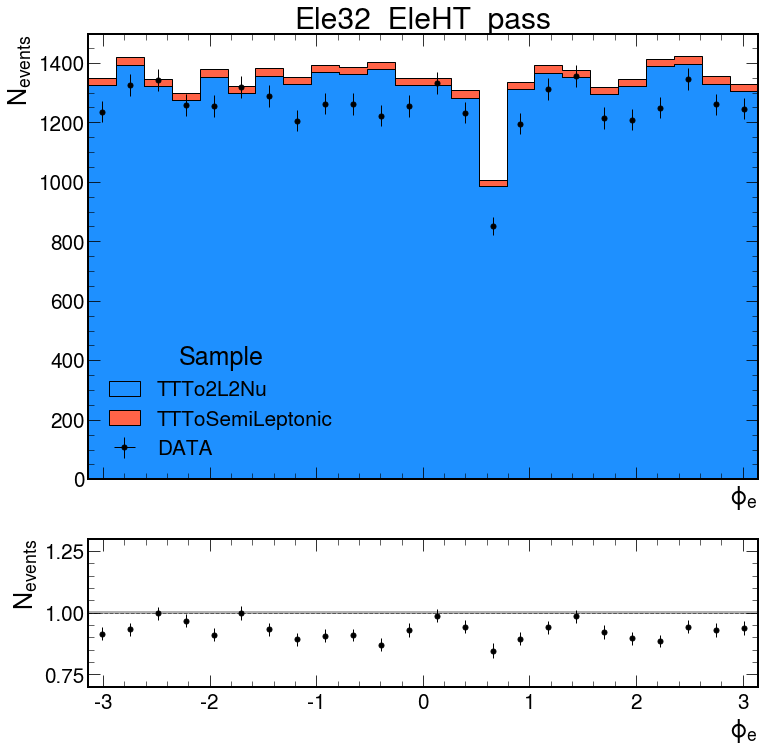

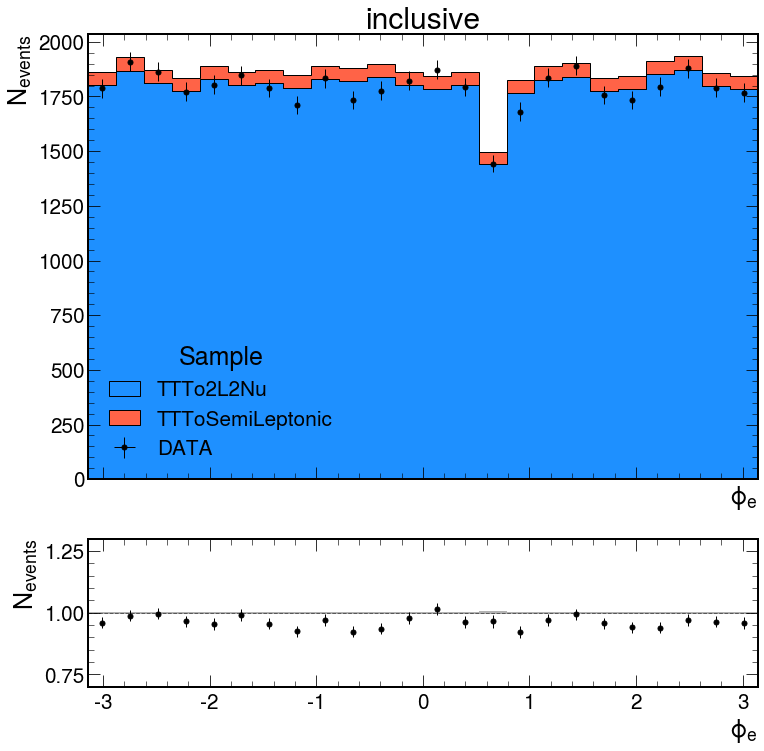

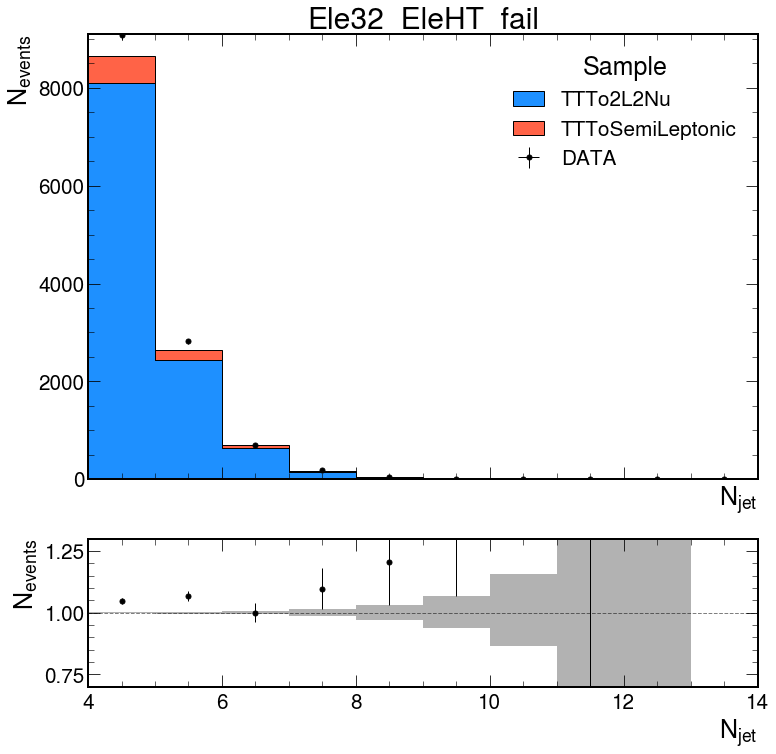

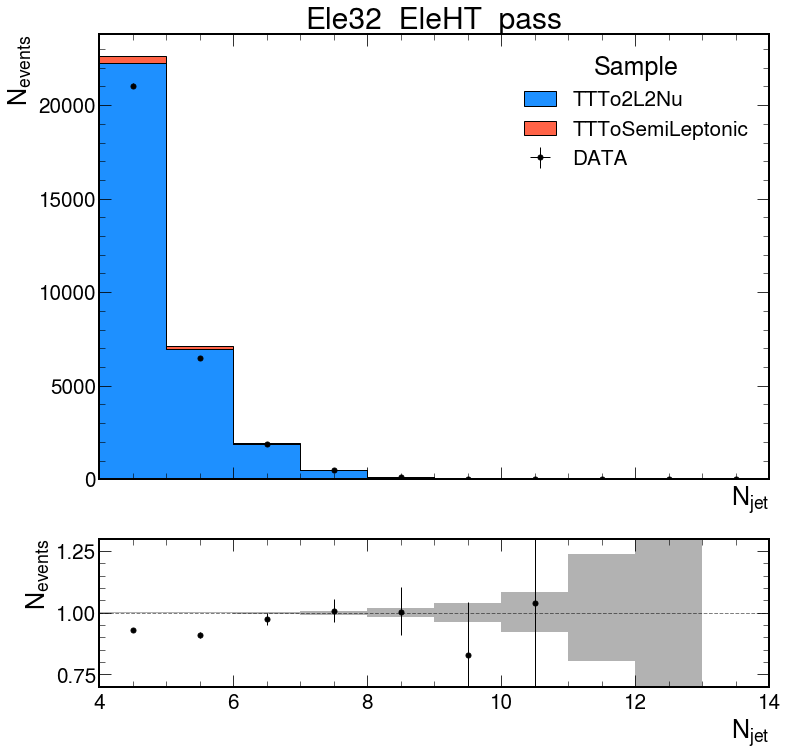

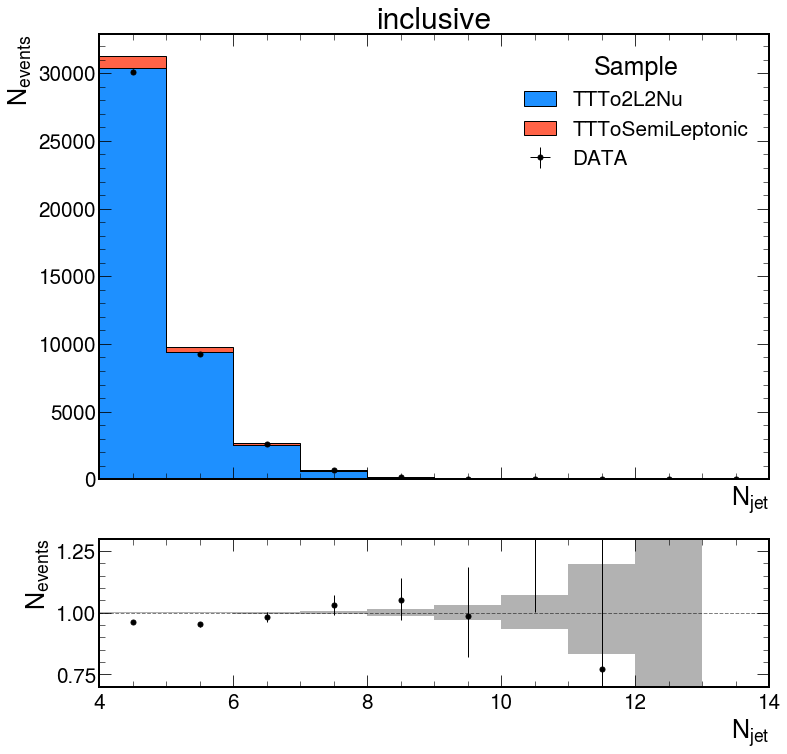

In [43]:
fontsize = 25
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
for histname in ['hist_electron_pt', 'hist_electron_etaSC', 'hist_electron_phi', 'hist_njet']:
    varname = histname.lstrip('hist_')
    h_ele = output[histname]
    for cat in categories + ['inclusive']:
        fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        plot.plot1d(h_ele[(datasets_mc, cat,'2018')].sum('cat', 'year'), ax=ax, fill_opts=opts_mc, stack=True)
        plot.plot1d(h_ele[(['DATA'], cat,'2018')].sum('cat', 'year'), ax=ax, error_opts=opts_data, clear=False)
        plot.plotratio(num=h_ele[(['DATA'], cat,'2018')].sum('cat', 'year', 'sample'), denom=h_ele[(datasets_mc, cat,'2018')].sum('cat', 'year', 'sample'), ax=rax,
                                   error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
        ax.set_title(cat)
        for axis in [ax, rax]:
            if cfg['variables'][varname] == None: continue
            axis.set_xlim(*cfg['variables'][varname]['xlim'])
            axis.xaxis.label.set_size(fontsize)
            axis.yaxis.label.set_size(fontsize)
        rax.set_ylim(0.7, 1.3)
        plt.savefig(os.path.join(plot_dir, f"{histname}_{cat}.png"), dpi=150, format="png")

In [18]:
x = np.array([1,3,5,7,4,2,0.4])
np.quantile(x, np.arange(0.2,1,0.2))

array([1.2, 2.4, 3.6, 4.8])

In [19]:
np.arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

In [20]:
np.cumsum(x)

array([ 1. ,  4. ,  9. , 16. , 20. , 22. , 22.4])

In [21]:
np.cumsum(x)/sum(x)

array([0.04464286, 0.17857143, 0.40178571, 0.71428571, 0.89285714,
       0.98214286, 1.        ])

In [22]:
len(x)*np.cumsum(x)/sum(x)

array([0.3125, 1.25  , 2.8125, 5.    , 6.25  , 6.875 , 7.    ])

In [23]:
x = h_ele_pt[(datasets, 'inclusive','2018')].sum('cat', 'year').values()[('TTTo2L2Nu',)]
x

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.40464997e+03,
       2.66198033e+03, 2.87678931e+03, 3.24788458e+03, 3.18390532e+03,
       2.97600510e+03, 2.74191118e+03, 2.48357173e+03, 2.29402577e+03,
       2.03838172e+03, 1.81502571e+03, 1.60056292e+03, 1.43878791e+03,
       1.26183049e+03, 1.11919786e+03, 9.90023623e+02, 8.63727179e+02,
       7.86085792e+02, 7.02041018e+02, 6.23615347e+02, 5.43734814e+02,
       4.79991068e+02, 4.25683739e+02, 3.77821930e+02, 3.35491973e+02,
       2.96389814e+02, 2.65822131e+02, 2.36382050e+02, 2.08536041e+02,
       1.83564711e+02, 1.67823939e+02, 1.46744504e+02, 1.27699933e+02,
       1.15348745e+02, 1.04378315e+02, 9.43966075e+01, 8.44837139e+01,
       7.52996719e+01, 6.81113019e+01, 6.38705910e+01, 5.56575897e+01,
       4.86618339e+01, 4.53742442e+01, 4.23630146e+01, 3.88149216e+01,
       3.33056664e+01, 3.03673275e+01, 2.65049979e+01, 2.43159553e+01,
       2.17956962e+01, 2.00285724e+01, 1.95090847e+01, 1.73787371e+01,
      

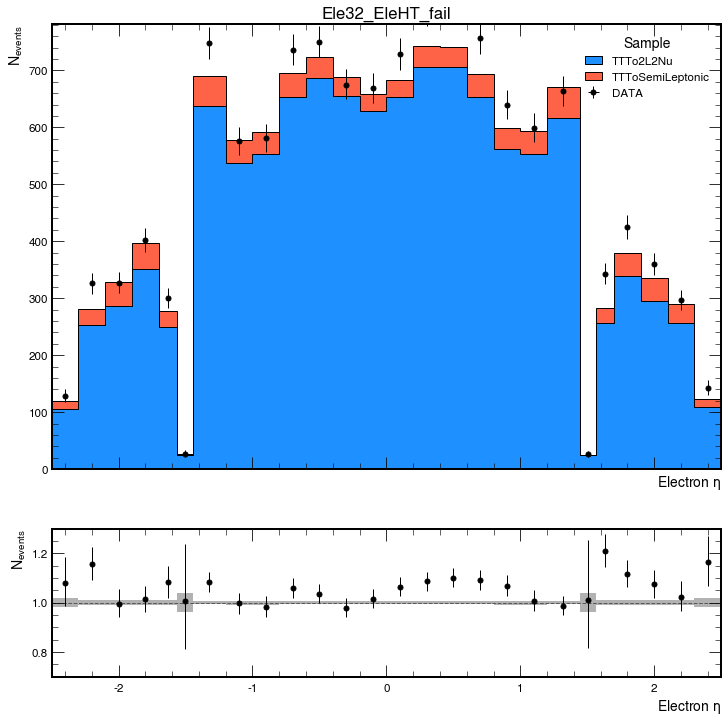

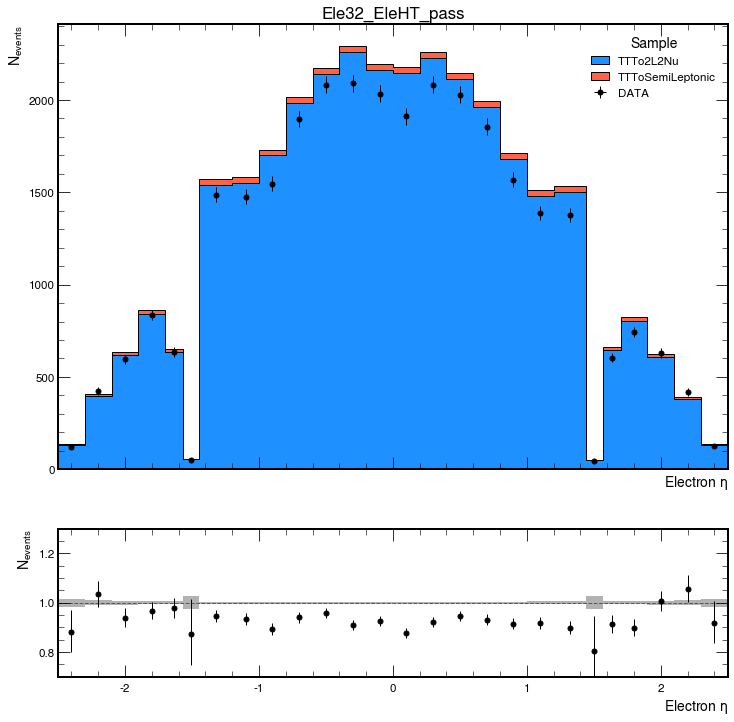

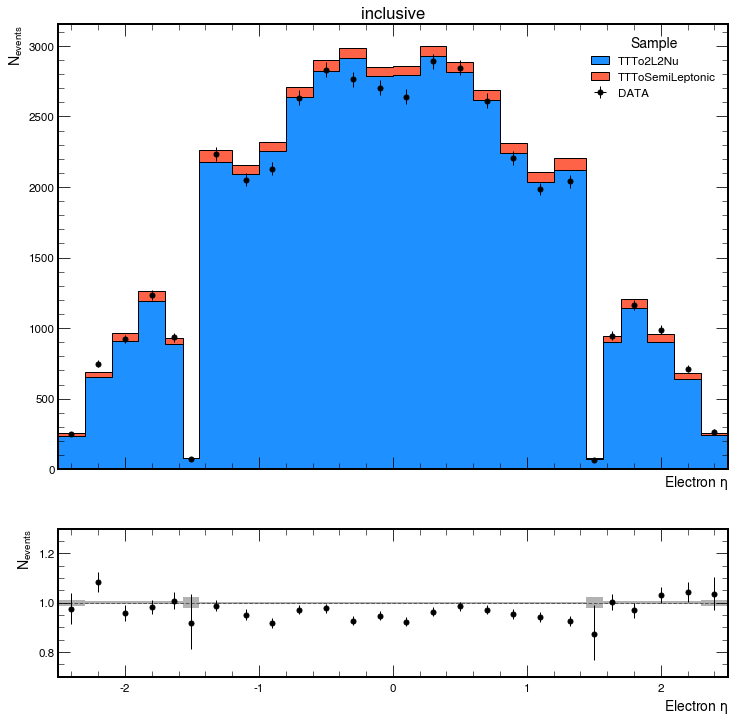

In [24]:
h_ele_eta = output['hist_electron_eta']
for cat in categories + ['inclusive']:
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    plot.plot1d(h_ele_eta[(datasets_mc, cat,'2018')].sum('cat', 'year'), ax=ax, fill_opts=opts_mc, stack=True)
    plot.plot1d(h_ele_eta[(['DATA'], cat,'2018')].sum('cat', 'year'), ax=ax, error_opts=opts_data, clear=False)
    plot.plotratio(num=h_ele_eta[(['DATA'], cat,'2018')].sum('cat', 'year', 'sample'), denom=h_ele_eta[(datasets_mc, cat,'2018')].sum('cat', 'year', 'sample'), ax=rax,
                               error_opts=opts_data, denom_fill_opts={}, guide_opts={}, unc='num')
    ax.set_xlim(-2.5, 2.5)
    rax.set_xlim(-2.5, 2.5)
    rax.set_ylim(0.7, 1.3)
    ax.set_title(cat)

In [25]:
x = np.array([1, 3, 7, 10])
np.ediff1d(x)

array([2, 4, 3])

In [26]:
h[(datasets_mc, 'inclusive', '2018')].values()

{('TTToSemiLeptonic',
  'inclusive',
  '2018'): array([[ 7.65306329, 17.34498876, 24.62430006, 25.95121294, 15.77841293,
          0.        , 30.32332443, 23.46708837, 22.88310801, 26.29682594,
         22.50043156, 21.34172977, 17.81203799, 18.42529533, 21.87850688,
         22.40758356, 24.59578821, 21.52603177, 22.46042817, 31.64442698,
          0.        , 15.45864854, 24.39468867, 23.51210337, 18.12096906,
          7.78227099],
        [ 3.05518682,  7.60264699, 11.13830739, 11.51946123,  7.3080456 ,
          0.        , 16.45639349, 11.4596252 , 10.74737113, 11.00710813,
         13.26767584, 10.18685788, 10.27742065,  9.4315475 , 10.36499097,
         11.36746968, 13.27266758, 10.45819262, 12.88597301, 16.29168989,
          0.        ,  7.52608719, 11.36328611, 11.12690315,  9.6850732 ,
          3.27332383],
        [ 1.92092709,  4.40379239,  6.5729408 ,  8.36055495,  5.57903449,
          0.        , 11.56824449,  9.3940947 ,  9.1120412 ,  8.16707291,
          8.5540428

/tmp/ipykernel_69652/2450080615.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,500);
/tmp/ipykernel_69652/2450080615.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100000);


<Hist (cat,pt,etaSC) instance at 0x7f854ac928b0>

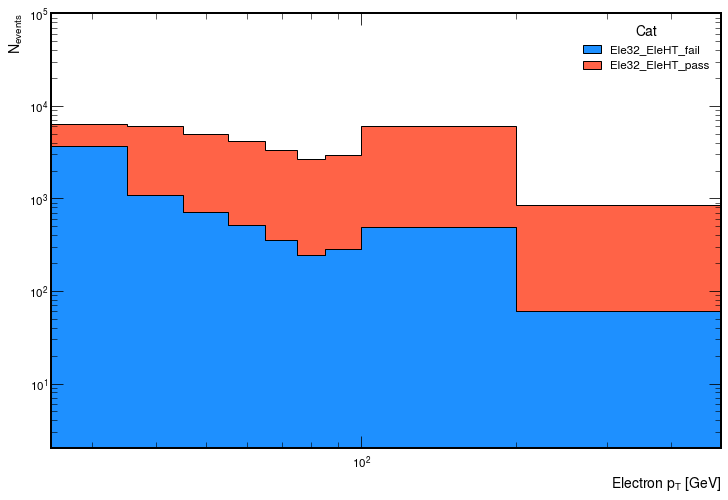

In [27]:
h_mc_pt = h_mc.project('cat', 'pt')
h_data_pt = h_data.project('cat', 'pt')
cat_passfail = list(filter(lambda x : 'Ele32_EleHT' in x, categories))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot.plot1d(h_data_pt[cat_passfail], ax=ax, fill_opts=opts_mc, stack=True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,500);
plt.ylim(0,100000);
h_data

(0.5, 1.5)

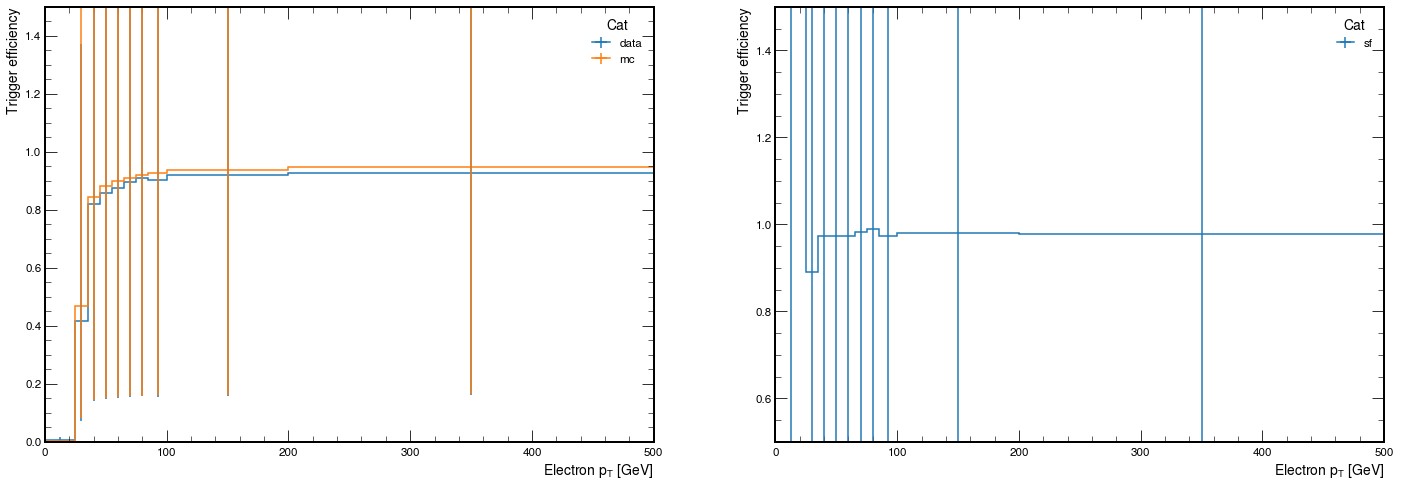

In [28]:
cat = "Ele32_EleHT_pass"
axis_cat = h_mc_pt.axis('cat')
axis_electron_pt = h_mc_pt.axis('pt')
w_mc = h_mc_pt[cat].sum('cat').values()[()] / h_mc_pt['inclusive'].sum('cat').values()[()]
w_data = h_data_pt[cat].sum('cat').values()[()] / h_data_pt['inclusive'].sum('cat').values()[()]
eff_pt = Hist("Trigger efficiency", axis_cat, axis_electron_pt)
eff_pt.fill(cat='mc', pt=bincenter_pt, weight=w_mc)
eff_pt.fill(cat='data', pt=bincenter_pt, weight=w_data)
eff_pt.fill(cat='sf', pt=bincenter_pt, weight=w_data/w_mc)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[24,8])
plot.plot1d(eff_pt[['mc','data']], ax=ax1);
ax1.set_xlim(0,500)
ax1.set_ylim(0,1.5)
plot.plot1d(eff_pt[['sf']], ax=ax2);
ax2.set_xlim(0,500)
ax2.set_ylim(0.5,1.5)
#eff_data_pt = h_data_pt[cat].sum('cat').values()[()]/h_data_pt['inclusive'].sum('cat').values()[()]
#sf_pt = eff_data_pt/eff_mc_pt
#sf_pt = np.nan_to_num(np.where(~np.isinf(sf_pt), sf_pt, np.nan))
#sf_pt

In [29]:
h_mc_pt['inclusive'].sum('cat').values()[()]

array([5.57481357e+03, 6.37574720e+03, 6.33681099e+03, 5.34956398e+03,
       4.42754570e+03, 3.48100793e+03, 2.75507337e+03, 3.02679454e+03,
       6.40995860e+03, 8.10658235e+02, 5.14991200e+00])

In [30]:
1./h_mc_pt['inclusive'].sum('cat').values()[()]

array([1.79378196e-04, 1.56844362e-04, 1.57808084e-04, 1.86931123e-04,
       2.25858764e-04, 2.87273117e-04, 3.62966741e-04, 3.30382517e-04,
       1.56007248e-04, 1.23356546e-03, 1.94178075e-01])